# Validation on Cancer Predictions

added AUC-ROC

In [2]:
from datetime import datetime

print("\033[32m{}\033[0m".format(datetime.now().strftime("%B %d, %Y %H:%M:%S")))

March 09, 2022 16:24:49


## Setup

In [3]:
import pandas as pd
from IPython.display import display

from utils import CancerValidation

BRCA_PREDICTION_PATH = "../../../../data/predictions_datasets/brca_prediction_2021-11-17/558297b6/predictions_soft_2021-11-17.csv"
COAD_PREDICTION_PATH = "../../../../data/predictions_datasets/coad_prediction_2022-01-06/9789393f/predictions_soft_2022-01-06.csv"
ESCA_PREDICTION_PATH = "../../../../data/predictions_datasets/esca_prediction_2021-11-17/59544312/predictions_soft_2021-11-17.csv"
GBM_PREDICTION_PATH = "../../../../data/predictions_datasets/gbm_prediction_2021-11-17/b9cfc7ea/predictions_soft_2021-11-17.csv"
HNSC_PREDICTION_PATH = "../../../../data/predictions_datasets/hnsc_prediction_2021-11-17/53930f30/predictions_soft_2021-11-17.csv"
OV_PREDICTION_PATH = "../../../../data/predictions_datasets/ov_prediction_2021-11-17/37bf1637/predictions_soft_2021-11-17.csv"

H_SAPIENS_INTERFACES_ALL_PATH = "../data/H_sapiens_interfacesALL.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load Cancer Prediction Datasets

In [4]:
brca_predictions = pd.read_csv(BRCA_PREDICTION_PATH)
coad_predictions = pd.read_csv(COAD_PREDICTION_PATH)
esca_predictions = pd.read_csv(ESCA_PREDICTION_PATH)
gbm_predictions = pd.read_csv(GBM_PREDICTION_PATH)
hnsc_predictions = pd.read_csv(HNSC_PREDICTION_PATH)
ov_predictions = pd.read_csv(OV_PREDICTION_PATH)

In [5]:
print(f"BRCA data: {brca_predictions.shape}")
display(brca_predictions.head())

print(f"COAD data: {coad_predictions.shape}")
display(coad_predictions.head())

print(f"ESCA data: {esca_predictions.shape}")
display(esca_predictions.head())

print(f"GBM data: {gbm_predictions.shape}")
display(gbm_predictions.head())

print(f"HNSC data: {hnsc_predictions.shape}")
display(hnsc_predictions.head())

print(f"OV data: {ov_predictions.shape}")
display(ov_predictions.head())

BRCA data: (3997, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P28062,R216W,P40306,1,0.55345
1,Q15842,E237K,Q14654,0,0.48443
2,Q15842,E237K,P63252,0,0.47205
3,Q9UKS6,R24H,Q9BY11,0,0.49584
4,Q9UKS6,R24H,Q9UNF0,0,0.41309


COAD data: (7517, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P62873,S334I,Q13371,0,0.48376
1,Q9BXB4,N590D,Q96SU4,1,0.64160
2,P35251,V921A,P35250,0,0.25170
3,P08123,K1248N,P25940,1,0.78179
4,P15056,V600E,P53667,0,0.43582


ESCA data: (1194, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P61088,E61K,P38398,1,0.57282
1,P61088,E61K,Q96PU5,1,0.68296
2,P61088,E61K,Q9Y4L5,1,0.62781
3,P61088,E61K,Q9Y3C5,1,0.60244
4,P61088,E61K,Q9C035,1,0.52623


GBM data: (2945, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P46734,K200E,P27361,1,0.81740
1,P46734,K200E,Q16512,1,0.91810
2,P46734,K200E,Q5S007,1,0.84646
3,P46734,K200E,Q9Y2U5,1,0.80720
4,P46734,K200E,Q99759,1,0.85617


HNSC data: (4003, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,Q13485,R361H,B7Z5N5,0,0.45127
1,Q13485,R361H,Q68DB7,0,0.47297
2,Q13485,R361H,Q53XR6,0,0.42872
3,Q9Y566,R2148H,Q9BYB0,0,0.19476
4,O15116,L87I,Q9Y333,1,0.83768


OV data: (2513, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P08134,D59E,P52565,0,0.28821
1,P62993,A3V,Q9H8V3,0,0.44397
2,P62993,A3V,Q14155,1,0.51214
3,O75175,Q684H,Q9NZN8,0,0.32091
4,O75175,Q684H,B2RDX7,0,0.33470


## Initialize Cancer Validation

In [6]:
cancer_validation = CancerValidation(interfaces_data_path=H_SAPIENS_INTERFACES_ALL_PATH)

In [7]:
brca_output = cancer_validation.load_output_dict("outputs/BRCA_output_ALL_2022-03-09.pickle")
coad_output = cancer_validation.load_output_dict("outputs/COAD_output_ALL_2022-03-09.pickle")
esca_output = cancer_validation.load_output_dict("outputs/ESCA_output_ALL_2022-03-09.pickle")
gbm_output = cancer_validation.load_output_dict("outputs/GBM_output_ALL_2022-03-09.pickle")
hnsc_output = cancer_validation.load_output_dict("outputs/HNSC_output_ALL_2022-03-09.pickle")
ov_output = cancer_validation.load_output_dict("outputs/OV_output_ALL_2022-03-09.pickle")

### BRCA

In [8]:
brca_output_0 = cancer_validation.validate_single_class("BRCA", brca_output, single_class=0)
brca_output_1 = cancer_validation.validate_single_class("BRCA", brca_output, single_class=1)

Using the class 0 only.
Using the class 1 only.


C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### COAD

In [9]:
coad_output_0 = cancer_validation.validate_single_class("COAD", coad_output, single_class=0)
coad_output_1 = cancer_validation.validate_single_class("COAD", coad_output, single_class=1)

C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Using the class 0 only.
Using the class 1 only.


### ESCA

In [10]:
esca_output_0 = cancer_validation.validate_single_class("ESCA", esca_output, single_class=0)
esca_output_1 = cancer_validation.validate_single_class("ESCA", esca_output, single_class=1)

Using the class 0 only.
Using the class 1 only.


C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### GBM

In [11]:
gbm_output_0 = cancer_validation.validate_single_class("GBM", gbm_output, single_class=0)
gbm_output_1 = cancer_validation.validate_single_class("GBM", gbm_output, single_class=1)

Using the class 0 only.
Using the class 1 only.


C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### HNSC

In [12]:
hnsc_output_0 = cancer_validation.validate_single_class("HNSC", hnsc_output, single_class=0)
hnsc_output_1 = cancer_validation.validate_single_class("HNSC", hnsc_output, single_class=1)

Using the class 0 only.
Using the class 1 only.


C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### OV

In [13]:
ov_output_0 = cancer_validation.validate_single_class("OV", ov_output, single_class=0)
ov_output_1 = cancer_validation.validate_single_class("OV", ov_output, single_class=1)

Using the class 0 only.


C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\ibrah\anaconda3\envs\MyVenvML\lib\site-packages\sklearn\metrics\_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Using the class 1 only.


## Combine metrics

In [14]:
metrics_merged = pd.concat(
    [
        brca_output["metrics_data"],
        coad_output["metrics_data"],
        esca_output["metrics_data"],
        gbm_output["metrics_data"],
        hnsc_output["metrics_data"],
        ov_output["metrics_data"],
    ]
)

In [15]:
metrics_merged_0 = pd.concat(
    [
        brca_output_0["metrics_data"],
        coad_output_0["metrics_data"],
        esca_output_0["metrics_data"],
        gbm_output_0["metrics_data"],
        hnsc_output_0["metrics_data"],
        ov_output_0["metrics_data"],
    ]
)

metrics_merged_1 = pd.concat(
    [
        brca_output_1["metrics_data"],
        coad_output_1["metrics_data"],
        esca_output_1["metrics_data"],
        gbm_output_1["metrics_data"],
        hnsc_output_1["metrics_data"],
        ov_output_1["metrics_data"],
    ]
)

In [16]:
metrics_merged

,TCGA,#_Entries,#_Disruptive,#_Non_disruptive,ACCURACY,BALANCED_ACCURACY,F1,PRECISION,RECALL,MATTHEWS_COR
0,BRCA,3997,862,1059,0.484643,0.483266,0.515181,0.535097,0.496695,-0.033300
0,COAD,7517,1693,1908,0.508470,0.508775,0.520585,0.538677,0.503669,0.017519
0,ESCA,1194,283,272,0.452252,0.452609,0.457143,0.444444,0.470588,-0.094832
0,GBM,2945,595,773,0.525585,0.523123,0.563551,0.586835,0.542044,0.045897
0,HNSC,4003,947,926,0.504538,0.504368,0.494002,0.498899,0.489201,0.008740
0,OV,2513,541,610,0.504778,0.506651,0.504348,0.537037,0.475410,0.013304


In [17]:
metrics_merged_0

,TCGA,#_Entries,#_Disruptive,#_Non_disruptive,ACCURACY,BALANCED_ACCURACY,F1,PRECISION,RECALL,MATTHEWS_COR
0,BRCA,1918,405,533,0.431770,0.5,0.0,0.0,0.0,0.0
0,COAD,3726,870,947,0.478811,0.5,0.0,0.0,0.0,0.0
0,ESCA,599,123,144,0.460674,0.5,0.0,0.0,0.0,0.0
0,GBM,1418,300,354,0.458716,0.5,0.0,0.0,0.0,0.0
0,HNSC,2065,492,473,0.509845,0.5,0.0,0.0,0.0,0.0
0,OV,1334,291,320,0.476268,0.5,0.0,0.0,0.0,0.0


In [18]:
metrics_merged_1

,TCGA,#_Entries,#_Disruptive,#_Non_disruptive,ACCURACY,BALANCED_ACCURACY,F1,PRECISION,RECALL,MATTHEWS_COR
0,BRCA,2079,457,526,0.535097,0.5,0.697150,0.535097,1.0,0.0
0,COAD,3791,823,961,0.538677,0.5,0.700182,0.538677,1.0,0.0
0,ESCA,595,160,128,0.444444,0.5,0.615385,0.444444,1.0,0.0
0,GBM,1527,295,419,0.586835,0.5,0.739629,0.586835,1.0,0.0
0,HNSC,1938,455,453,0.498899,0.5,0.665687,0.498899,1.0,0.0
0,OV,1179,250,290,0.537037,0.5,0.698795,0.537037,1.0,0.0


## AUC-ROC calculations

In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
brca_output_0.keys()

dict_keys(['data_validation', 'data_validation_processed', 'metrics_data'])

In [21]:
brca_output_0["data_validation_processed"]

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability,Validation
3,Q9UKS6,R24H,Q9BY11,0,0.49584,0
4,Q9UKS6,R24H,Q9UNF0,0,0.41309,0
18,Q01196,G95R,Q13951,0,0.34566,0
25,Q71DI3,E98Q,P62805,0,0.38460,0
30,P20810,D466H,P17655,0,0.42636,1
...,...,...,...,...,...,...
3979,Q9NTU7,S74L,Q6UW01,0,0.48150,1
3980,Q15303,P920R,Q92625,0,0.40740,1
3981,Q15303,P920R,Q7Z6G8,0,0.41155,1
3989,P42336,H1047R,P27986,0,0.40254,1


In [22]:
fpr_brca, tpr_brca, thresholds_brca = roc_curve(
    brca_output["data_validation_processed"]["Validation"], brca_output["data_validation_processed"]["Median_Probability"]
)

In [23]:
fpr_brca_0, tpr_brca_0, thresholds_brca_0 = roc_curve(
    brca_output_0["data_validation_processed"]["Validation"], brca_output_0["data_validation_processed"]["Median_Probability"]
)

In [24]:
fpr_brca_1, tpr_brca_1, thresholds_brca_1 = roc_curve(
    brca_output_1["data_validation_processed"]["Validation"], brca_output_1["data_validation_processed"]["Median_Probability"]
)

In [25]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

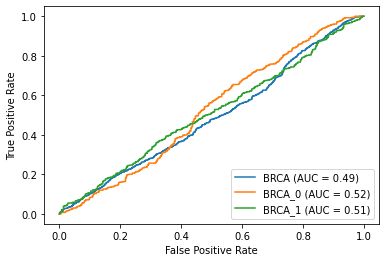

In [26]:
fig, ax = plt.subplots()
display_brca = RocCurveDisplay(fpr=fpr_brca, tpr=tpr_brca, roc_auc=auc(fpr_brca, tpr_brca))
display_brca_0 = RocCurveDisplay(fpr=fpr_brca_0, tpr=tpr_brca_0, roc_auc=auc(fpr_brca_0, tpr_brca_0))
display_brca_1 = RocCurveDisplay(fpr=fpr_brca_1, tpr=tpr_brca_1, roc_auc=auc(fpr_brca_1, tpr_brca_1))
display_brca.plot(ax=ax, name="BRCA")
display_brca_0.plot(ax=ax, name="BRCA_0")
display_brca_1.plot(ax=ax, name="BRCA_1")

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.show()

In [27]:
AUC_TCGA_MAPPING = {
    "BRCA": (brca_output_0, brca_output_1, brca_output),
    "COAD": (coad_output_0, coad_output_1, coad_output),
    "ESCA": (esca_output_0, esca_output_1, esca_output),
    "GBM": (gbm_output_0, gbm_output_1, gbm_output),
    "HNSC": (hnsc_output_0, hnsc_output_1, hnsc_output),
    "OV": (ov_output_0, ov_output_1, ov_output),
}

In [28]:
def calculate_auc_per_tcga(tcga_name, auc_tcga_tuple, row_i, col_i, fig, ax):
    fpr_tcga_0, tpr_tcga_0, thresholds_tcga_0 = roc_curve(
        auc_tcga_tuple[0]["data_validation_processed"]["Validation"], auc_tcga_tuple[0]["data_validation_processed"]["Median_Probability"]
    )

    fpr_tcga_1, tpr_tcga_1, thresholds_tcga_1 = roc_curve(
        auc_tcga_tuple[1]["data_validation_processed"]["Validation"], auc_tcga_tuple[1]["data_validation_processed"]["Median_Probability"]
    )

    fpr_tcga_2, tpr_tcga_2, thresholds_tcga_2 = roc_curve(
        auc_tcga_tuple[2]["data_validation_processed"]["Validation"], auc_tcga_tuple[2]["data_validation_processed"]["Median_Probability"]
    )


    # fig, ax = plt.subplots(nrows=3, ncols=2)
    display_tcga_0 = RocCurveDisplay(fpr=fpr_tcga_0, tpr=tpr_tcga_0, roc_auc=auc(fpr_tcga_0, tpr_tcga_0))
    display_tcga_1 = RocCurveDisplay(fpr=fpr_tcga_1, tpr=tpr_tcga_1, roc_auc=auc(fpr_tcga_1, tpr_tcga_1))
    display_tcga_2 = RocCurveDisplay(fpr=fpr_tcga_2, tpr=tpr_tcga_2, roc_auc=auc(fpr_tcga_2, tpr_tcga_2))

    display_tcga_0.plot(ax=ax[row_i][col_i], name=f"{tcga_name}_0")
    display_tcga_1.plot(ax=ax[row_i][col_i], name=f"{tcga_name}_1")
    display_tcga_2.plot(ax=ax[row_i][col_i], name=f"{tcga_name}")

    # ax[subplot_i].set_xlabel("False Positive Rate")
    # ax[subplot_i].set_ylabel("True Positive Rate")
    # plt.title(f"{tcga_name}")

    ax[row_i][col_i].set_title(f"{tcga_name}")


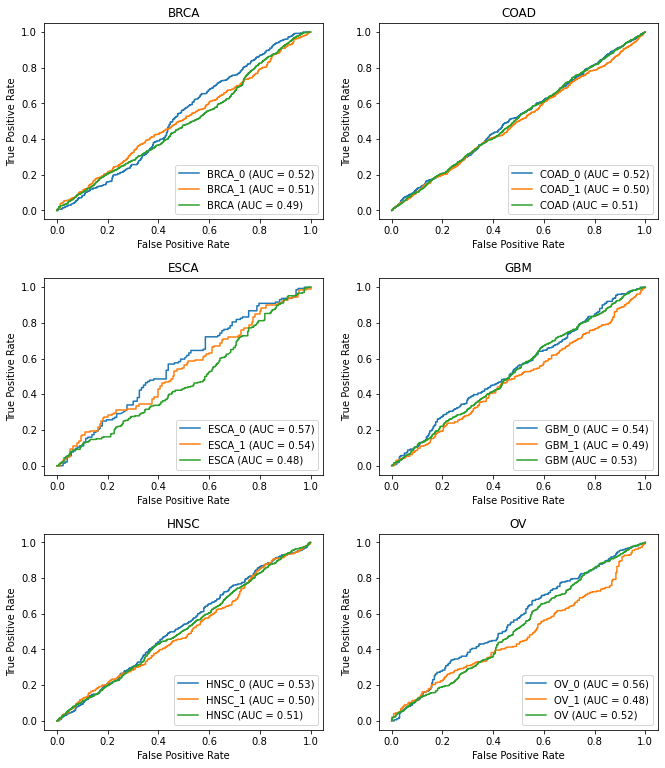

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(11, 13))
plt.subplots_adjust(hspace=0.3)

c_i = 0
r_i = 0
for index, (tcga_name, auc_tcga) in enumerate(AUC_TCGA_MAPPING.items()):
    calculate_auc_per_tcga(tcga_name, auc_tcga, row_i=r_i, col_i=c_i, fig=fig, ax=ax)
    r_i = r_i if index % 2 == 0 else r_i + 1
    c_i = 1 if c_i == 0 else 0

plt.show()

# ------------------------

In [122]:
foo = cancer_validation.load_output_dict(pickle_path="outputs/BRCA_output_2022-02-28.pickle")

In [124]:
foo.keys()

dict_keys(['data_validation', 'data_validation_processed', 'metrics_data'])

In [125]:
foo["data_validation"]

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability,Validation
0,P28062,R216W,P40306,1,0.55345,N/A
1,Q15842,E237K,Q14654,0,0.48443,N/A
2,Q15842,E237K,P63252,0,0.47205,N/A
3,Q9UKS6,R24H,Q9BY11,0,0.49584,Disruptive
4,Q9UKS6,R24H,Q9UNF0,0,0.41309,Disruptive
...,...,...,...,...,...,...
3992,P62140,F169C,P41236,0,0.41558,N/A
3993,P61371,D207E,Q969G2,0,0.36453,Non-disruptive
3994,P61371,D207E,Q8TE12,0,0.33794,N/A
3995,P61371,D207E,Q96A47,0,0.33685,N/A


In [130]:
from IPython.display import display as view

In [138]:
foo_sampled = foo["data_validation"].sample()
[protein] = foo_sampled["UniProt_ID"]
[mutation] = foo_sampled["Mutation"]
[interactor] = foo_sampled["Interactor_UniProt_ID"]

view(foo_sampled)

print(f"protein: {protein}")
print(f"mutation: {mutation}")
print(f"{protein}\t{interactor}")
print(f"{interactor}\t{protein}")

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability,Validation
776,Q07820,D242N,P55957,1,0.74467,Disruptive


protein: Q07820
mutation: D242N
Q07820	P55957
P55957	Q07820


In [162]:
foo_sampled = foo["data_validation_processed"].sample()
[protein] = foo_sampled["UniProt_ID"]
[mutation] = foo_sampled["Mutation"]
[interactor] = foo_sampled["Interactor_UniProt_ID"]

view(foo_sampled)

print(f"protein: {protein}")
print(f"mutation: {mutation}")
print(f"{protein}\t{interactor}")
print(f"{interactor}\t{protein}")

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability,Validation
1911,P08697,S248N,P08246,1,0.75752,1


protein: P08697
mutation: S248N
P08697	P08246
P08246	P08697


In [154]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [158]:
bar = foo["data_validation_processed"]
bar_pred_0 = bar[bar["Prediction"] == 0]
bar_pred_1 = bar[bar["Prediction"] == 1]

In [159]:
print("Accuracy: {}".format(accuracy_score(
    bar_pred_0["Validation"], bar_pred_0["Prediction"]
)))

Accuracy: 0.29273504273504275


In [160]:
print("Accuracy: {}".format(accuracy_score(
    bar_pred_1["Validation"], bar_pred_1["Prediction"]
)))

Accuracy: 0.6894790602655771


In [155]:
accuracy_score(
    y_true=foo["data_validation_processed"]["Validation"],
    y_pred=foo["data_validation_processed"]["Prediction"],
)

0.4955613577023499

In [156]:
balanced_accuracy_score(
    y_true=foo["data_validation_processed"]["Validation"],
    y_pred=foo["data_validation_processed"]["Prediction"],
)

0.4894550367113276

In [109]:
fpr_test, tpr_test, thresholds_test = roc_curve(
    brca_output_0["data_validation_processed"]["Validation"], brca_output_0["data_validation_processed"]["Median_Probability"]
)

In [115]:
y_temp = brca_output_0["data_validation_processed"]["Validation"]
y_pred_prob_temp = brca_output_0["data_validation_processed"]["Median_Probability"]

In [111]:
from collections import Counter

In [112]:
Counter(y_temp)

Counter({0: 274, 1: 662})

In [121]:
brca_output_0["data_validation_processed"]["Median_Probability"].to_csv("foo.csv", index=False)

In [119]:
y_pred_prob_temp.head()

3     0.49584
4     0.41309
18    0.34566
25    0.38460
30    0.42636
Name: Median_Probability, dtype: float64

In [23]:
from matplotlib import pyplot as plt

In [25]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
RocCurveDisplay()



In [ ]:
fig, ax = plt.subplots()
display_1 = RocCurveDisplay(fpr=fpr_1, tpr=tpr_1, roc_auc=auc(fpr_1, tpr_1), estimator_name="1")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
display_2 = RocCurveDisplay(fpr=fpr_2, tpr=tpr_2, roc_auc=auc(fpr_2, tpr_2), estimator_name="2")
display_1.plot(ax=ax, name="1")
display_2.plot(ax=ax, name="2")


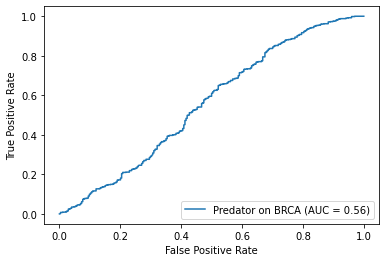

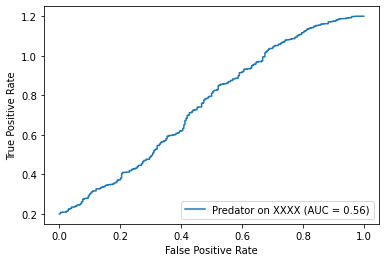

In [37]:
fpr, tpr, thresholds = roc_curve(y_temp, y_pred_prob_temp)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Predator on BRCA')
display2 = RocCurveDisplay(fpr=fpr, tpr=tpr + 0.2, roc_auc=roc_auc, estimator_name='Predator on XXXX')
display.plot()
display2.plot()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6.5, 2.5))
for col in score_columns:
    display = RocCurveDisplay.from_predictions(
        df["effect_score"] > 0, df[col], name=labels[col.split("_")[0]], ax=ax
    )
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.55), bbox_transform=ax.transAxes)
fig.subplots_adjust(left=0.09, right=0.54, top=0.98, bottom=0.17)

# ---------------